# ***Chest X-Ray Images (Pneumonia) Dataset***

In [0]:
#Chest X-Ray Images (Pneumonia)

# Dataset

## Description

The dataset contains a total of  5,863 images. This is binary classification problem



## Objective

Build classification model to detect pneumonia

# Data Preprocessing

In [0]:
import pandas as pd
import numpy as np

In [0]:
import zipfile


zip_files = ['data']
# Will unzip the files so that you can see them..
for zip_file in zip_files:
    with zipfile.ZipFile("{}.zip".format(zip_file),"r") as z:
        z.extractall(".")
        print("{} unzipped".format(zip_file))

data unzipped


In [0]:
import os
# dimensions of our images.
img_width, img_height = 150, 150


In [0]:
train_data_dir = '/content/chest_xray/train'
validation_data_dir = '/content/chest_xray/val'
test_data_dir = '/content/chest_xray/test'

In [0]:
input_shape = (img_width, img_height, 3)

In [0]:
#we are using ImageDataGenerator to read images from directories
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1/255)
test_datagen= ImageDataGenerator(rescale=1/255)
valid_datagen= ImageDataGenerator(rescale=1/255)

train_generator = train_datagen.flow_from_directory(
   train_data_dir,
     target_size=(150,150), class_mode= "binary",  batch_size=20)

test_generator= test_datagen.flow_from_directory(
    test_data_dir, 
     target_size=(150,150),
    batch_size=20,
    class_mode='binary')


valid_generator= valid_datagen.flow_from_directory(
   validation_data_dir , 
     target_size=(150,150),
    batch_size=20,
    class_mode='binary')

Found 5216 images belonging to 2 classes.
Found 624 images belonging to 2 classes.
Found 16 images belonging to 2 classes.


In [0]:
for data_batch, labels_batch in train_generator:
  print('data batch shape:', data_batch.shape)
  print('labels batch shape:', labels_batch.shape)
  break

data batch shape: (20, 150, 150, 3)
labels batch shape: (20,)


In [0]:
nb_train_samples = 5217
nb_validation_samples = 17
epochs = 20
batch_size = 20

# Basic Model

In [0]:
from keras import models
from keras import layers

from keras import backend
backend.clear_session()

model=models.Sequential()
model.add(layers.Conv2D(32, (3,3), activation="relu", input_shape=(150, 150, 3)))
model.add(layers.Conv2D(32, (3,3), activation="relu"))
model.add(layers.MaxPooling2D((2,2)))
#model.add(layers.Dropout(0.25))

model.add(layers.Conv2D(64, (3,3), activation="relu"))
model.add(layers.Conv2D(64, (3,3), activation="relu"))
#model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D(2,2))
#model.add(layers.Dropout(0.25))

model.add(layers.Conv2D(128, (3,3), activation="relu"))
model.add(layers.Conv2D(128, (3,3), activation="relu"))
#model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D((2,2)))
#model.add(layers.Dropout(0.25))

model.add(layers.Conv2D(64, (3,3), activation="relu"))
model.add(layers.Conv2D(64, (3,3), activation="relu"))
#model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D((2,2)))
#model.add(layers.Dropout(0.25))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation="relu"))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(1, activation="sigmoid"))
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 146, 146, 32)      9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 73, 73, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 71, 71, 64)        18496     
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 69, 69, 64)        36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 34, 34, 64)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 32, 32, 128)      

In [0]:
model.compile(loss="binary_crossentropy", 
             optimizer='rmsprop',
             metrics=["accuracy"])
print("[INFO]: model compiled...")

[INFO]: model compiled...


In [0]:
history = model.fit_generator(train_generator,  epochs=10, validation_data= valid_generator)

Epoch 1/10
261/261 [==============================] - 48s 182ms/step - loss: 0.5908 - accuracy: 0.7446 - val_loss: 0.6896 - val_accuracy: 0.6250
Epoch 2/10
261/261 [==============================] - 48s 183ms/step - loss: 0.2647 - accuracy: 0.9066 - val_loss: 0.5104 - val_accuracy: 0.7500
Epoch 3/10
261/261 [==============================] - 48s 182ms/step - loss: 0.1663 - accuracy: 0.9373 - val_loss: 0.7352 - val_accuracy: 0.7500
Epoch 4/10
261/261 [==============================] - 48s 184ms/step - loss: 0.1310 - accuracy: 0.9496 - val_loss: 0.9628 - val_accuracy: 0.6875
Epoch 5/10
261/261 [==============================] - 48s 184ms/step - loss: 0.1210 - accuracy: 0.9590 - val_loss: 0.3117 - val_accuracy: 0.8750
Epoch 6/10
261/261 [==============================] - 48s 183ms/step - loss: 0.1169 - accuracy: 0.9632 - val_loss: 1.0453 - val_accuracy: 0.7500
Epoch 7/10
261/261 [==============================] - 48s 185ms/step - loss: 0.1162 - accuracy: 0.9638 - val_loss: 0.4840 - val_ac

In [0]:
model.evaluate(test_generator)

32/32 [==============================] - 5s 166ms/step


[0.5282440781593323, 0.7564102411270142]

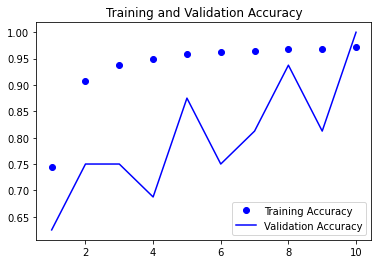

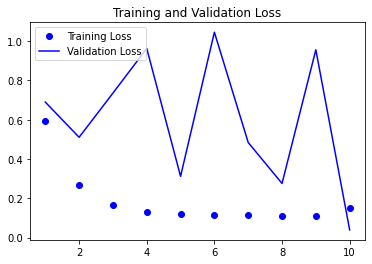

In [0]:
import matplotlib.pyplot as plt

acc= history.history['accuracy']
val_acc = history.history['val_accuracy']
loss=history.history['loss']
val_loss=history.history['val_loss']

epochs = range(1, len(acc)+1)

plt.plot(epochs, acc, 'bo', label='Training Accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'bo', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.legend()

plt.show()

# Model With Data Augmentation

In [0]:
#we are using ImageDataGenerator to read images from directories
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1/255, shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)
test_datagen= ImageDataGenerator(rescale=1/255)
valid_datagen= ImageDataGenerator(rescale=1/255)

train_generator = train_datagen.flow_from_directory(
   train_data_dir,
     target_size=(150,150), class_mode= "binary",  batch_size=20)

test_generator= test_datagen.flow_from_directory(
    test_data_dir, 
     target_size=(150,150),
    batch_size=20,
    class_mode='binary')


valid_generator= valid_datagen.flow_from_directory(
   validation_data_dir , 
     target_size=(150,150),
    batch_size=20,
    class_mode='binary')

Found 5216 images belonging to 2 classes.
Found 624 images belonging to 2 classes.
Found 16 images belonging to 2 classes.


In [0]:
from keras import backend
backend.clear_session()

In [0]:
from keras import models
from keras import layers
from keras.layers import Conv2D
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense

model = models.Sequential()
model.add(Conv2D(32, (3, 3), input_shape=input_shape))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(1))
model.add(Activation('sigmoid'))

In [0]:
model.compile(loss="binary_crossentropy", 
             optimizer='rmsprop',
             metrics=["accuracy"])
print("[INFO]: model compiled...")

[INFO]: model compiled...


In [0]:
history1 = model.fit_generator(train_generator, steps_per_epoch=nb_train_samples // batch_size,  epochs=10, validation_data= valid_generator, validation_steps=nb_validation_samples // batch_size)

Epoch 1/10
260/260 [==============================] - 68s 262ms/step - loss: 0.4443 - accuracy: 0.8172 - val_loss: 0.6042 - val_accuracy: 0.6875
Epoch 2/10
260/260 [==============================] - 66s 254ms/step - loss: 0.3020 - accuracy: 0.8863 - val_loss: 0.5433 - val_accuracy: 0.8125
Epoch 3/10
260/260 [==============================] - 65s 252ms/step - loss: 0.2317 - accuracy: 0.9126 - val_loss: 2.0892 - val_accuracy: 0.6250
Epoch 4/10
260/260 [==============================] - 67s 256ms/step - loss: 0.2168 - accuracy: 0.9178 - val_loss: 1.8662 - val_accuracy: 0.6250
Epoch 5/10
260/260 [==============================] - 67s 257ms/step - loss: 0.2062 - accuracy: 0.9292 - val_loss: 2.0181 - val_accuracy: 0.6250
Epoch 6/10
260/260 [==============================] - 66s 253ms/step - loss: 0.1916 - accuracy: 0.9319 - val_loss: 0.9772 - val_accuracy: 0.6875
Epoch 7/10
260/260 [==============================] - 65s 249ms/step - loss: 0.1852 - accuracy: 0.9319 - val_loss: 1.9770 - val_ac

In [0]:
model.evaluate(test_generator)

32/32 [==============================] - 5s 150ms/step


[1.9785579442977905, 0.8782051205635071]

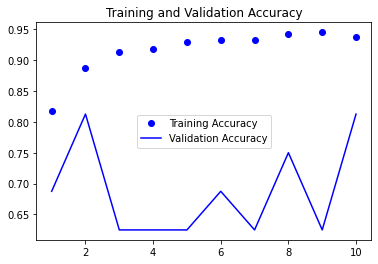

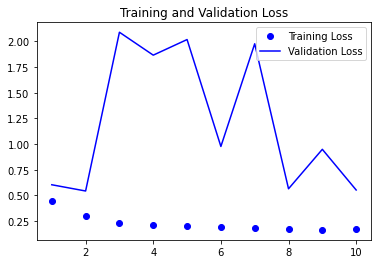

In [0]:
import matplotlib.pyplot as plt

acc= history1.history['accuracy']
val_acc = history1.history['val_accuracy']
loss=history1.history['loss']
val_loss=history1.history['val_loss']

epochs = range(1, len(acc)+1)

plt.plot(epochs, acc, 'bo', label='Training Accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'bo', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.legend()

plt.show()